# Latar Belakang

Pakistan merupakan negara dengan penduduk terbanyak ke-5 di dunia. Populasi penduduk telah mencapai angka lebih dari 200 juta orang sejak tahun 2012 dengan proporsi penduduk pria lebih tinggi dibandingkan wanita (sumber: [worldbank.org](https://data.worldbank.org/indicator/SP.POP.TOTL.MA.ZS?locations=PK)). Pakistan memiliki GDP lebih dari 300 juta dollar di tahun 2017 dan urutan ke-40 di dunia (sumber: [worldometers.com](https://www.worldometers.info/gdp/gdp-by-country/)). Dengan tingginya populasi dan pertumbuhan ekonomi positif, Pakistan tentu merupakan target pasar yang sangat besar, tidak terkecuali bagi industri e-commerce.

Dataset Pakistan_Largest_Ecommerce_Dataset.csv berisi setengah juta data transaksi e-commerce di Pakistan sejak Juli 2016 hingga Agustus 2018. Data ini berisi informasi seperti tanggal transaksi, kategori produk, jumlah transaksi, status transaksi, metode pembayaran, dan Customer ID. Data ini dapat kita gunakan untuk melihat pola belanja pelanggan e-commerce di Pakistan. Setelah mengetahui gambaran mengenai pola transaksi masyarakat Pakistan di e-commerce, diharapkan dapat ditemukan beberapa rekomendasi bisnis yang sesuai untuk pengembangan e-commerce di Pakistan.


# Pembatasan Masalah

Pola atau perilaku belanja dapat diketahui melalui hubungan antara beberapa variabel seperti jumlah, status, dan waktu transaksi, kategori produk, dan metode pembayaran. Kemudian setelah menganalisis variabel-variabel tersebut, kita dapat mengetahui:
1. Bagaimana pertumbuhan transaksi e-commerce di Pakistan?
2. Apa kategori pembelian produk terbanyak?
3. Metode pembayaran apa yang paling populer?

# Data Understanding

Sebelum memulai analisis permasalahan, kita perlu memahami terlebih dahulu isi dan konteks dari data. Mari kita tampilkan dulu datanya. 
Data dapat diakses [di sini](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset).

In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1. Menampilkan data

In [617]:
df=pd.read_csv('Pakistan_Largest_Ecommerce_Dataset.csv')
display(df.head(), df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset ini memiliki total 26 kolom dengan 5 kolom yang kosong. 21 kolom berisikan data terkait informasi pelanggan dan transaksi yang dilakukan dengan keterangan sebagai berikut:

1. item_id : nomor ID atau kode transaksi per produk per pelanggan
2. status : status pesanan
3. created_at : tanggal pembuatan pesanan
4. SKU : stock keeping unit/kode yang mengidentifikasi setiap jenis produk
5. price : harga tiap unit produk
6. qty_ordered : jumlah produk yang dipesan
7. grand_total : total harga yang dibayarkan oleh pelanggan per transaksi
8. increment_id : kode per 1 kali transaksi pelanggan
9. category_name_1 : kategori produk
10. sales_comission_code : kode komisi sales
11. discount_amount : jumlah diskon
12. payment_method : metode pembayaran
13. Working Date : tanggal pesanan diproses
14. BI Status : status transaksi
15.  MV : total harga per produk yang dipesan sebelum diskon
16. Year : tahun transaksi
17. Month : bulan transaksi
18. Customer Since : tanggal pelanggan bergabung dengan e-commerce
19. M-Y : bulan-tahun transaksi
20. FY : tahun fiskal perusahaan
21. Customer ID : nomor ID pelanggan

Secara sekilas terlihat bahwa data ini memiliki banyak sekali data kosong atau missing value. Mari kita cek kembali gambaran dan informasi umum dari dataset.

### 2. Informasi umum Dataset

In [618]:
df.shape

(1048575, 26)

Data memiliki 1.048.575 baris dan 26 kolom.

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [620]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


In [621]:
df.describe(include=object)

,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


Secara umum kita bisa melihat beberapa anomali data:
- Hampir setengah dari jumlah baris pada data merupakan data kosong, sehingga baris yang tidak berisi data sama sekali dapat dihapus saja
- Terdapat 5 kolom kosong, tidak berisi data sama sekali, sehingga dapat dihapus saja
- Pada kolom MV terdapat kelebihan spasi di awal nama kolom
- Nama kolom category_name_1 memiliki angka 1 yang tidak memiliki arti sehingga bisa diubah saja

# Data Cleaning

Proses menangani anomali data disebut dengan data cleaning. Contoh anomali data yang umum terjadi diantaranya adalah data duplikat, data kosong/missing value, kesalahan penulisan data, dan outlier.

### 1. Data duplikat

Pertama kita ingin mengetahui apakah terdapat data duplikat didalam dataset.

In [622]:
df[df.duplicated()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
584525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ternyata data duplikat yang ditemukan adalah baris kosong yang jumlahnya hampir setengah dari keseluruhan data. Karena baris kosong ini tidak dapat kita gunakan maka dapat langsung dihapus.

In [623]:
df = df.drop_duplicates()

Mari kita cek kembali apakah data duplikat sudah semua terhapus.

In [624]:
df.duplicated().sum()

0

Hasilnya sudah tidak terdapat duplikat dalam dataset.

### 2. Missing value

Selanjutnya akan kita cek jumlah dan persentase data kosong pada setiap kolom didalam dataset.

In [625]:
list = []
for col in df.columns :
    list.append( [col, df[col].isna().sum(), df[col].isna().sum()/df.shape[0]*100] )

table1 = pd.DataFrame(columns=['Column Name', 'Null', 'Null Percentage'],
                     data=list)
table1

,Column Name,Null,Null Percentage
0,item_id,1,0.000171
1,status,16,0.002737
2,created_at,1,0.000171
3,sku,21,0.003593
4,price,1,0.000171
5,qty_ordered,1,0.000171
6,grand_total,1,0.000171
7,increment_id,1,0.000171
8,category_name_1,165,0.028228
9,sales_commission_code,137176,23.467944


- Seperti yang telah disebutkan sebelumnya, terdapat 5 kolom kosong yang tidak berisi data sama sekali.
- Terdapat 137.176 baris yang kosong pada kolom sales_commision_code, atau sebesar 23.47%.
- Selain itu pada kolom lainnya persentase missing value sangat kecil dibandingkan keseluruhan data.

Terdapat beberapa cara untuk mengatasi missing value
1. Deletion method: dapat dilakukan dengan asumsi data merupakan data random dan tidak berkaitan dengan variabel lain (MCAR). Ada 2 cara yaitu list-wise deletion (menghapus baris yang memiliki data kosong) dan pairwise deletion (menghapus hanya baris data di kolom yang memiliki data kosong nya saja).
2. Imputation method: mengisi data kosong paling baik dengan mencari data sebenarnya, atau kita dapat mengisinya berdasarkan variabel/data di kolom lain yang berkaitan misalnya dengan metode regresi, atau mengisinya dengan nilai mean dari kolom tersebut (perlu diperhatikan distribusi data).
3. Model machine learning: mengisi data kosong dengan prediksi menggunakan model machine learning.

<AxesSubplot: >

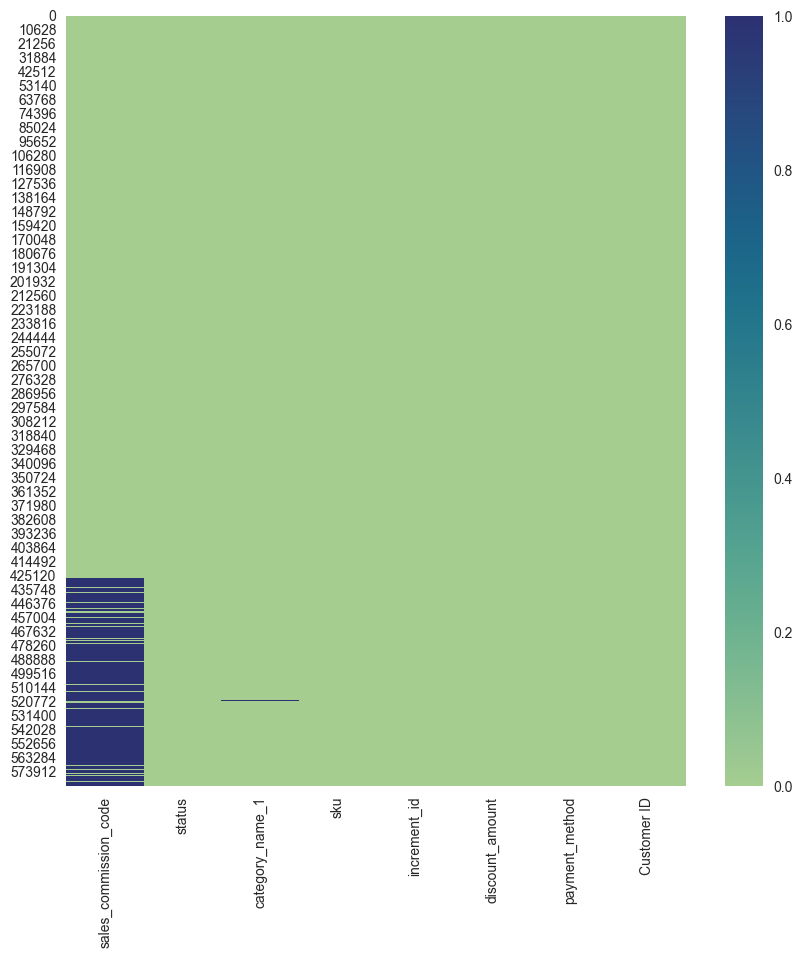

In [626]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['sales_commission_code','status','category_name_1','sku','increment_id','discount_amount','payment_method','Customer ID']].isna(), cmap='crest')

Untuk kasus pada dataset ini, dari sebaran missing value di dalam data, missing value yang ditemukan semuanya merupakan data kosong yang random, tidak memiliki pola tertentu dan tidak juga berkaitan dengan variabel lainnya, sehingga kita asumsikan missing value termasuk MCAR. Karena kita tidak dapat mengisi data kosong dengan mencari data sebenarnya, maupun dengan metode regresi atau mean imputation, karena data juga termasuk kategorikal/nominal, maka missing value semua akan dihapus. 
Kolom kosong dan kolom sales_commission_code akan dihapus berdasarkan kolom, sementara missing value lainnya yang memiliki persentase kecil akan dihapus berdasarkan baris yang memiliki data kosong.

In [627]:
df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [628]:
df.drop(columns='sales_commission_code', inplace=True)

In [629]:
df = df.dropna()

In [630]:
df.isna().sum()

item_id            0
status             0
created_at         0
sku                0
price              0
qty_ordered        0
grand_total        0
increment_id       0
category_name_1    0
discount_amount    0
payment_method     0
Working Date       0
BI Status          0
 MV                0
Year               0
Month              0
Customer Since     0
M-Y                0
FY                 0
Customer ID        0
dtype: int64

Hasilnya sudah tidak terdapat missing value dalam dataset.

### 3. Kesalahan penulisan data

Kesalahan penulisan data tadi sudah disebutkan ada pada nama kolom MV dan category_name_1.

In [631]:
df.rename(columns={' MV ':'MV'},inplace=True)

In [632]:
df.rename(columns={'category_name_1':'category_name'},inplace=True)

Selanjutnya mari kita cek data unik pada data kategorikal untuk melihat ada tidaknya kesalahan penulisan data lainnya.

In [633]:
column = ['status', 'category_name', 'payment_method', 'BI Status']
list2 = []
for col in column :
    list2.append( [col, df[col].unique()] )

table2 = pd.DataFrame(columns=['Column Name', 'unique'],
                     data=list2)
table2

,Column Name,unique
0,status,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, processing, payment_review]"
1,category_name,"[Women's Fashion, Beauty & Grooming, Soghaat, Mobiles & Tablets, Appliances, Home & Living, Men's Fashion, Kids & Baby, \N, Others, Entertainment, Computing, Superstore, Health & Sports, Books, School & Education]"
2,payment_method,"[cod, ublcreditcard, mygateway, customercredit, cashatdoorstep, mcblite, internetbanking, marketingexpense, productcredit, financesettlement, Payaxis, jazzvoucher, jazzwallet, Easypay, Easypay_MA, easypay_voucher, bankalfalah, apg]"
3,BI Status,"[#REF!, Gross, Net, Valid]"


Pada kolom status dan category_name terdapat data \N yang tidak memiliki makna sehingga sebaiknya baris dengan data tersebut dihapus. Data #REF! pada kolom BI Status juga sebaiknya dihapus.

In [634]:
df.drop(df.loc[df['status'] == r'\N'].index, inplace=True)

df.drop(df.loc[df['category_name'] == r'\N'].index, inplace=True)

df.drop(df.loc[df['BI Status'] == '#REF!'].index, inplace=True)

Selain itu pada kolom status dan payment method terdapat beberapa data yang bermakna sama namun penulisannya berbeda sehingga lebih baik dilakukan penggabungan kategori data. 
Penggabungan kategori data yang dapat dilakukan pada kolom status diantaranya:
- Canceled : canceled, fraud
- Complete : complete, received, closed, paid, cod
- Refunded : order_refunded, refund, exchange
- Processing : holded, pending_paypal, pending, processing, payment_review

Sementara untuk kolom payment method hanya akan dilakukan penggantian nama data cashatdoorstep menjadi cod karena memiliki makna yang sama.

In [635]:
df['status'].replace('fraud', 'canceled', inplace=True)
df['status'].replace(['received', 'closed', 'paid', 'cod'], 'complete', inplace=True)
df['status'].replace(['order_refunded', 'refund', 'exchange'], 'refunded', inplace=True)
df['status'].replace(['holded', 'pending_paypal', 'pending', 'payment_review'], 'processing', inplace=True)

In [636]:
df['payment_method'].replace('cashatdoorstep', 'cod', inplace=True)

Sekarang mari kita cek kembali kondisi data.

In [637]:
column1 = ['status', 'category_name', 'payment_method', 'BI Status']
list3 = []
for col in column1 :
    list3.append( [col, df[col].unique()] )

table3 = pd.DataFrame(columns=['Column Name', 'unique'],
                     data=list3)
table3

,Column Name,unique
0,status,"[canceled, complete, refunded, processing]"
1,category_name,"[Beauty & Grooming, Women's Fashion, Soghaat, Mobiles & Tablets, Appliances, Home & Living, Men's Fashion, Kids & Baby, Others, Entertainment, Computing, Superstore, Health & Sports, Books, School & Education]"
2,payment_method,"[cod, ublcreditcard, mygateway, customercredit, mcblite, internetbanking, productcredit, financesettlement, Payaxis, marketingexpense, jazzvoucher, jazzwallet, Easypay, Easypay_MA, easypay_voucher, bankalfalah, apg]"
3,BI Status,"[Gross, Net, Valid]"


Sudah tidak terdapat kesalahan penulisan data dan kategori data pada kolom status telah berubah.

### 4. Outlier

Outlier adalah suatu data numerik yang nilainya sangat jauh berbeda dari nilai data lainnya didalam dataset. Keberadaan outlier akan mempengaruhi distribusi data yang kemudian berpengaruh pada nilai rata-rata dan menyebabkan bias.
Outlier dapat dideteksi dengan visualisasi data atau menggunakan pendekatan statistik.

<AxesSubplot: xlabel='discount_amount'>

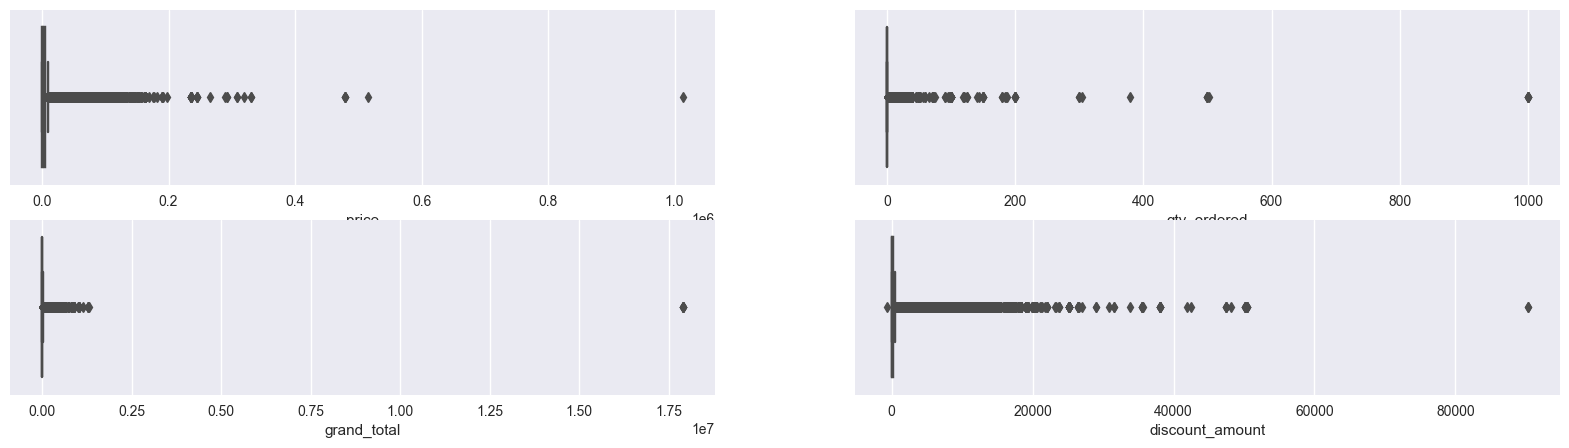

In [662]:
plt.figure(figsize=(20,5))

plt.subplot(2,2,1)
sns.boxplot(x = df['price'])

plt.subplot(2,2,2)
sns.boxplot(x = df['qty_ordered'])

plt.subplot(2,2,3)
sns.boxplot(x = df['grand_total'])

plt.subplot(2,2,4)
sns.boxplot(x = df['discount_amount'])

Dari visualisasi boxplot diatas dapat dilihat banyak sekali outlier yang berada diatas upper bound/batas atas data. Kemudian bila kita cek sebaran datanya menggunakan histogram untuk salah satu kolom misalnya kolom price.

<AxesSubplot: xlabel='price', ylabel='Count'>

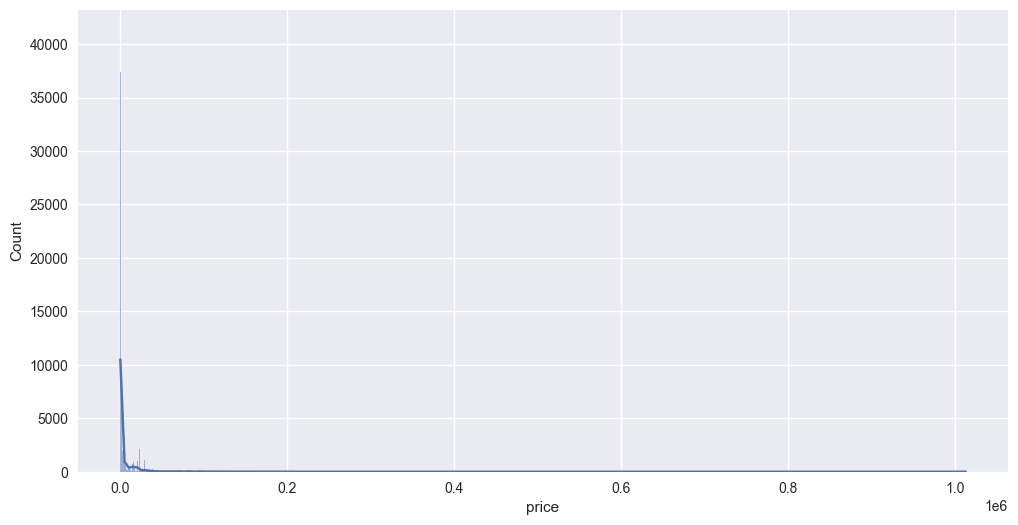

In [663]:
plt.figure(figsize=(12,6))
sns.histplot(data=df['price'], kde=True)

Terlihat bahwa data pada kolom price sangat bervariasi dengan range yang sangat jauh sehingga data berdistribusi tidak normal (right skewed). Mari kita cek statistik deskriptif dari kolom price.

#### Measure of central tendency

In [668]:
modus_price = df['price'].mode()
median_price = df['price'].median()
mean_price = df['price'].mean()

print(f'Nilai modus kolom price = {modus_price}')
print(f'Nilai median kolom price = {median_price}')
print(f'Nilai rata-rata kolom price = {mean_price}')

Nilai modus kolom price = 0    1000.0
Name: price, dtype: float64
Nilai median kolom price = 900.0
Nilai rata-rata kolom price = 6380.583905582154


In [669]:
max_price = df['price'].max()
min_price = df['price'].min()
range_price = max_price - min_price

print(f'Nilai max kolom price = {max_price}')
print(f'Nilai min kolom price = {min_price}')
print(f'Range kolom price = {range_price}')

Nilai max kolom price = 1012625.9
Nilai min kolom price = 0.0
Range kolom price = 1012625.9


In [670]:
std_price = df['price'].std()

print(f'Standar deviasi kolom price = {std_price}')

Standar deviasi kolom price = 15006.925604475706


Selain dengan visualisasi data kita juga dapat mengecek keberadaan outlier menggunakan pendekatan statistik yaitu dengan menghitung IQR. Contohnya kita akan mencari IQR untuk kolom price dan nilai batas atas dan bawahnya. Data yang nilainya lebih kecil dari batas bawah atau lebih besar dari batas atas adalah outlier.

In [672]:
IQR = Q3 - Q1

print(f'IQR kolom price = {IQR}')

IQR kolom price = 3693.0


In [673]:
lower = IQR - 1.5*IQR
upper = IQR + 1.5*IQR

print(f'batas bawah = {lower}')
print(f'batas atas = {upper}')

batas bawah = -1846.5
batas atas = 9232.5


In [674]:
(df['price'] >= 9232.5).value_counts()

False    469315
True     107165
Name: price, dtype: int64

Dari hasil perhitungan, dapat terlihat bahwa pada kolom price data yang nilainya diatas batas atas 9.232,5 termasuk outlier dan jumlahnya ada 107.165 data. Dan dari visualisasi boxplot, terlihat untuk kolom grand_total, qty_ordered, dan discount_amount pun jumlah outlier akan cukup besar. Untuk jumlah outlier sebesar ini, tidak mungkin untuk menghapus data, karena dapat terjadi kekurangan data dalam analisis. 

Data outlier pada dataset ini berada pada kolom yang berisi nominal harga (harga, total harga, diskon) dan jumlah pembelian produk. Nominal harga akan dipengaruhi oleh jenis/kategori produk. Karena pada dataset ini kategori produk sangat beragam mulai dari produk makanan/soghaat yang harganya relatif murah hingga elektronik dan gadget yang mahal, maka range datanya pun menjadi sangat besar. Dan karena jumlah data terkonsentrasi pada produk dengan harga rendah maka data dengan harga yang tinggi menjadi outlier. Sehingga pada dataset ini keberadaan outlier tetap dipertahankan.
Sedangkan untuk kolom qty_ordered, jumlah pembelian barang juga menggambarkan perilaku belanja pelanggan sehingga data tetap dipertahankan.

In [675]:
# menyimpan file yang sudah bersih

df.to_csv('Pakistan_Largest_Ecommerce_Dataset_cleaned.csv', index=False)

# Data Analysis

## 1. Pertumbuhan transaksi di e-commerce

Karena data akan disajikan berdasarkan waktu pembelian maka akan divisualisasikan dengan line plot.

### Pertumbuhan transaksi per tahun

In [715]:
transaksi = df[['grand_total']].groupby(df['Year']).sum().reset_index()
transaksi

,Year,grand_total
0,2016.0,6.148929e+08
1,2017.0,2.242076e+09
2,2018.0,2.093097e+09


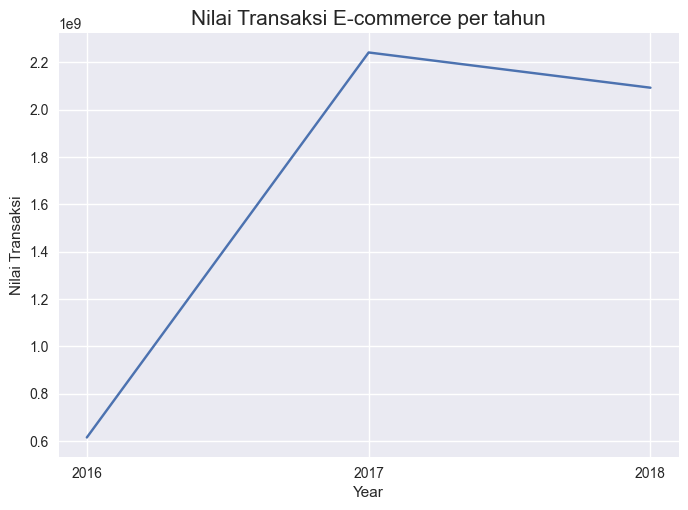

In [716]:
sns.lineplot(data=transaksi, x='Year', y='grand_total')
plt.title('Nilai Transaksi E-commerce per tahun', fontsize=15)
plt.xlabel('Year')
plt.xticks([2016, 2017, 2018])
plt.ylabel('Nilai Transaksi')
plt.show()

Tahun 2016 adalah tahun dimana e-commerce mulai berkembang dengan sangat cepat. Hal ini seiring dengan tingkat pengguna internet di Pakistan yang terus meningkat tajam sejak tahun 2012 (sumber: [data.worldbank](https://data.worldbank.org/indicator/IT.NET.USER.ZS?locations=PK)). Data pada tahun 2018 menunjukan sedikit penurunan nilai transaksi karena data hanya tersedia hingga bulan Agustus, sehingga diasumsikan nilai transaksi masih akan terus meningkat hingga bulan Desember dan melampaui jumlah nilai transaksi di tahun 2017.

### Rata-rata nilai transaksi per bulan

In [717]:
transaksi2 = df[['grand_total']].groupby(df['Month']).mean().reset_index()
transaksi2

,Month,grand_total
0,1.0,8036.308900
1,2.0,10578.779270
2,3.0,9136.318142
3,4.0,8045.895724
4,5.0,11334.604673
5,6.0,13786.274478
6,7.0,10140.358296
7,8.0,7195.434850
8,9.0,6640.247687
9,10.0,6967.771609


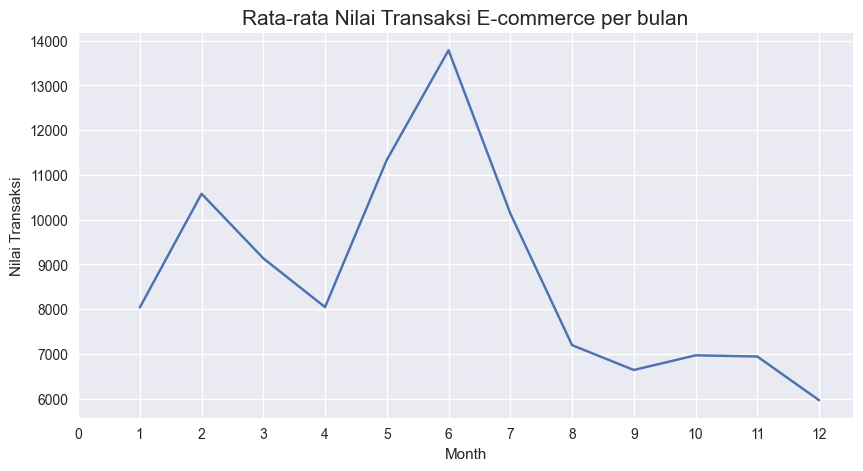

In [718]:
plt.figure(figsize=(10,5))
sns.lineplot(data=transaksi2, x='Month', y='grand_total')
plt.title('Rata-rata Nilai Transaksi E-commerce per bulan', fontsize=15)
plt.xlabel('Month')
plt.xticks(np.arange(13))
plt.ylabel('Nilai Transaksi')
plt.show()

Tren nilai transaksi per bulan disajikan dalam bentuk rata-rata setiap tahunnya karena data bulan yang tersedia per tahun tidak sama jumlahnya. Dapat terlihat bahwa peak nilai transaksi tertinggi terjadi pada bulan Juni. Bila mempertimbangkan populasi penduduk Pakistan yang 97% adalah muslim (sumber: [wikipedia](https://id.wikipedia.org/wiki/Pakistan)), maka tingginya nilai transaksi ini dipengaruhi oleh bulan ramadhan dan hari raya idul fitri yang jatuh pada bulan Juni/Juli di tahun 2016-2017 (sumber: [timeanddate.com](https://id.wikipedia.org/wiki/Pakistan)).

### Pertumbuhan volume transaksi

Volume atau jumlah transaksi dapat kita peroleh melalui kode increment_id atau kode per 1 kali transaksi per pelanggan. Kode ini bisa saja memuat beberapa kategori produk yang berbeda dalam 1 kali transaksi.

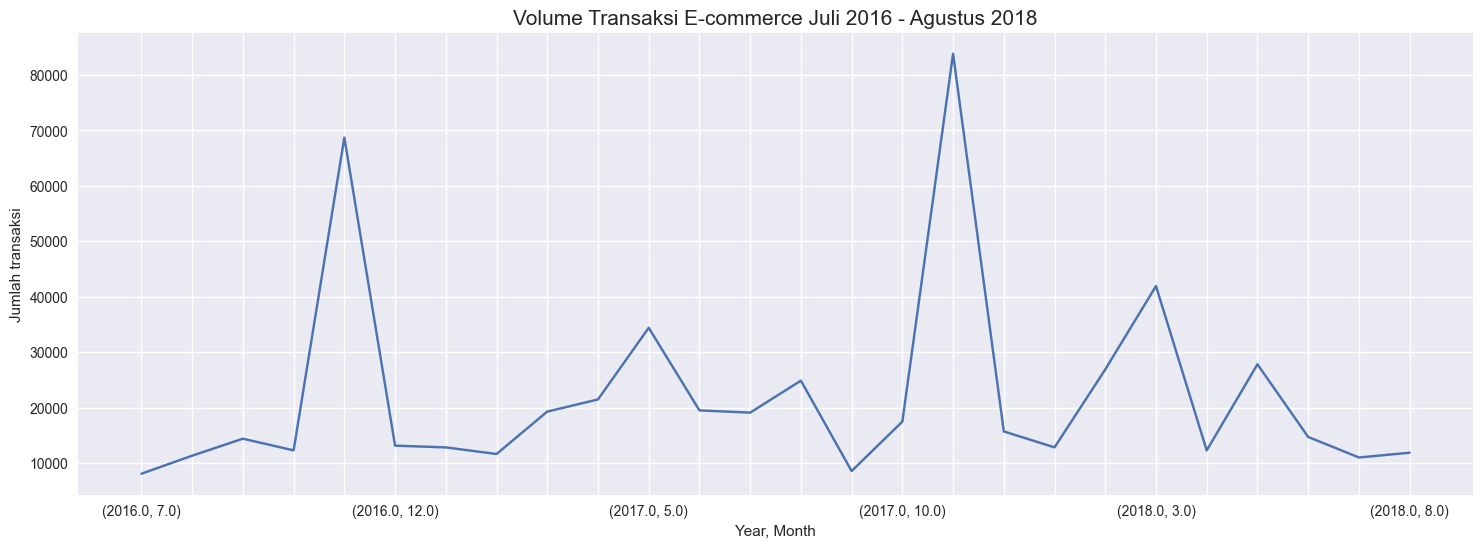

In [719]:
vol_transaksi = df.groupby(['Year','Month'])['increment_id'].count()

plt.figure(figsize=(18,6))
vol_transaksi.plot(x=['Year','Month'], y = 'increment_id', kind='line')
plt.title('Volume Transaksi E-commerce Juli 2016 - Agustus 2018', fontsize=15)
plt.xticks(np.arange(26))
plt.xlabel('Year, Month')
plt.ylabel('Jumlah transaksi')
plt.show()

Peak tertinggi volume transaksi e-commerce di Pakistan berada di bulan November baik di tahun 2016 maupun 2017. Sedangkan bila berdasarkan total nilai transaksi, peak tertinggi terjadi pada bulan Juni. Hal ini dapat terjadi karena 2 kemungkinan, yaitu karena status transaksi yang tidak complete atau harga produk yang dibeli di bulan tersebut hanya sedikit berkontribusi terhadap total nilai harga transaksi. Mari kita telusuri lebih lanjut volume transaksi ini berdasarkan status transaksi dan harga produk.

### Volume transaksi vs status transaksi

In [720]:
statusByVolume = df.groupby(['Month','status']).count()['increment_id'].reset_index().rename(columns={'increment_id' : 'jumlah_transaksi'})
statusByVolume

,Month,status,jumlah_transaksi
0,1.0,canceled,7054
1,1.0,complete,15069
2,1.0,processing,1
3,1.0,refunded,3583
4,2.0,canceled,11975
5,2.0,complete,22024
6,2.0,processing,31
7,2.0,refunded,4531
8,3.0,canceled,25860
9,3.0,complete,30226


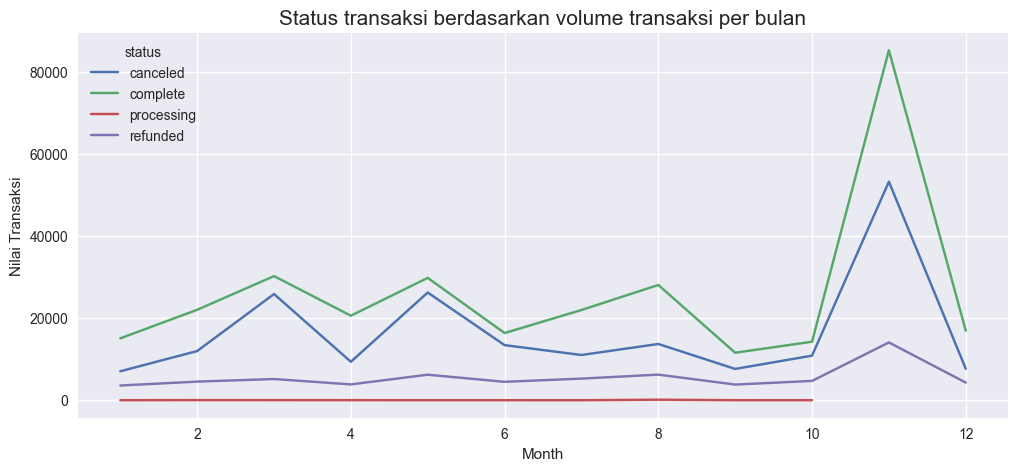

In [721]:
plt.figure(figsize=(12,5))
sns.lineplot(data=statusByVolume, x='Month', y='jumlah_transaksi', hue='status')
plt.title('Status transaksi berdasarkan volume transaksi per bulan', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Nilai Transaksi')
plt.show()

Status transaksi pada bulan November seharusnya memberikan lebih banyak data canceled dibandingkan complete, sehingga nilai total transaksi menjadi lebih kecil dibandingkan bulan Juni. Namun dari visualisasi data terlihat jumlah transaksi complete masih lebih tinggi dibandingkan transaksi canceled. Untuk itu kita telusuri lebih jauh melalui harga produk. Harga produk selain dipengaruhi berdasarkan kategori produk, yaitu ada produk yang harganya relatif murah dan mahal, tetapi juga dipengaruhi oleh jumlah diskon.

### Jumlah diskon setiap bulan

In [723]:
discount = df.groupby(['Month','payment_method']).sum()['discount_amount'].reset_index()
discount

,Month,payment_method,discount_amount
0,1.0,Easypay,2527080.073
1,1.0,Easypay_MA,31900.000
2,1.0,Payaxis,573069.253
3,1.0,bankalfalah,0.000
4,1.0,cod,1428136.490
...,...,...,...
134,12.0,cod,117426.460
135,12.0,customercredit,5100.010
136,12.0,easypay_voucher,3599.970
137,12.0,jazzvoucher,5200.000


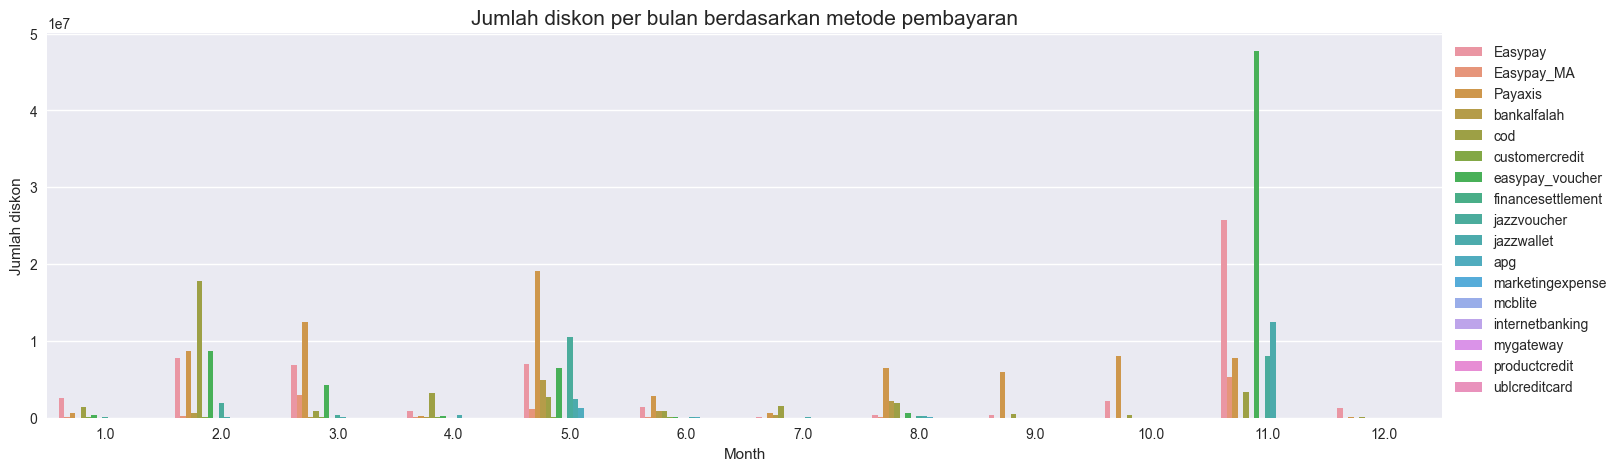

In [724]:
plt.figure(figsize=(18,5))
sns.barplot(data=discount, x='Month', y='discount_amount', hue='payment_method')
plt.title('Jumlah diskon per bulan berdasarkan metode pembayaran', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Jumlah diskon')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Sangat jelas terlihat di visualisasi data bahwa jumlah diskon tertinggi berada di bulan November, yaitu bulan dimana volume transaksi meningkat dengan cukup tinggi. Dapat kita asumsikan bahwa di bulan November pemberian diskon untuk transaksi di e-commerce sangat tinggi. Bila kita telaah lagi transaksi dengan jumlah diskon tertinggi di bulan November dilakukan melalui pembayaran dengan Easypay_voucher, dan jumlahnya meningkat tajam dibandingkan bulan lainnya. Dapat kita asumsikan bahwa tingginya volume transaksi pada bulan November dan mengapa nilai total transaksinya bukan merupakan yang tertinggi disebabkan oleh tingginya promosi diskon yang disediakan oleh platform Easypay. Faktanya pada bulan November 2016 terdapat event kolaborasi promosi dari platform e-commerce dan Easypay dalam rangka Black Friday (sumber: [pakwired.com](https://pakwired.com/daraz-black-friday-zong-easypay/)), begitu pula pada tahun 2017 (sumber: [dawn.com](https://www.dawn.com/news/1370701)). Event ini diselenggarakan sebagai ajang promosi digital seiring dengan meningkatnya penggunaan internet dan pembayaran online di Pakistan.

## 2. Best selling product

### Kategori produk dengan pembelian terbanyak selama Juli 2016-Agustus 2018

In [727]:
best = df['item_id'].groupby(df['category_name']).count().sort_values(ascending=False).reset_index().rename(columns={'item_id' : 'jumlah_transaksi'})
best

,category_name,jumlah_transaksi
0,Mobiles & Tablets,115709
1,Men's Fashion,92218
2,Women's Fashion,59719
3,Appliances,52413
4,Superstore,43611
5,Beauty & Grooming,41493
6,Soghaat,34011
7,Others,29208
8,Home & Living,26504
9,Entertainment,26322


Text(0.5, 1.0, 'Best Selling Product Juli 2016 - Agustus 2018')

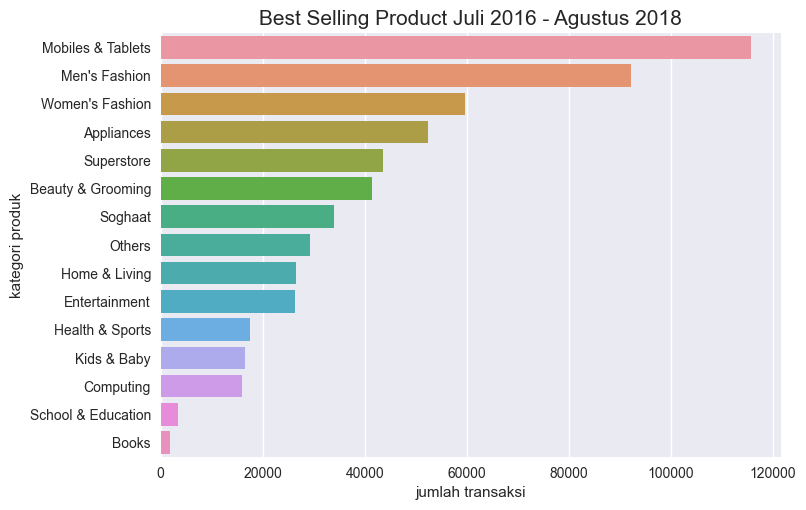

In [728]:
sns.barplot(data=best, y='category_name', x='jumlah_transaksi')
plt.xlabel('jumlah transaksi')
plt.ylabel('kategori produk')
plt.title('Best Selling Product Juli 2016 - Agustus 2018',fontsize = 15)

Produk yang paling populer dibeli melalui e-commerce adalah Mobile & Tablets atau gadget, disusul dengan kategori Men's Fashion dan Woman's Fashion. Menariknya, produk yang terlaris adalah kategori produk yang biasanya diminati oleh pria dibandingkan wanita, padahal yang identik dengan belanja biasanya adalah wanita. Faktanya, secara global pengguna internet pria 12% lebih banyak dibandingkan wanita. Dan di Pakistan sendiri, pada tahun 2018 dari peningkatan pengguna internet sebesar 33%, 21% nya adalah pria dan 12% nya adalah wanita (sumber: [dailytimes.com.pk](https://dailytimes.com.pk/382517/digital-divide-affecting-more-women-than-men/)). Perbedaan kebiasaan penggunaan internet antara pria dan wanita ini berpengaruh pada kategori produk yang banyak dibeli di e-commerce.

Sementara produk yang kurang diminati untuk dibeli secara online adalah Books dan School & Education atau produk-produk yang berkaitan dengan literasi. Hal ini dapat disebabkan oleh tingkat literasi di Pakistan masih tergolong rendah yaitu 59,13% di tahun 2017 dan menurun menjadi 57,01% di tahun 2018 (sumber: [statista.com](https://www.statista.com/statistics/572781/literacy-rate-in-pakistan/)).

### Rata-rata pembelian produk per kategori per bulan

In [729]:
bestByMonth = df.groupby(['Month','category_name']).count()['increment_id'].reset_index().rename(columns={'increment_id' : 'jumlah_transaksi'})
bestByMonth

,Month,category_name,jumlah_transaksi
0,1.0,Appliances,1873
1,1.0,Beauty & Grooming,2168
2,1.0,Books,133
3,1.0,Computing,663
4,1.0,Entertainment,752
...,...,...,...
175,12.0,Others,192
176,12.0,School & Education,235
177,12.0,Soghaat,2656
178,12.0,Superstore,935


<AxesSubplot: xlabel='Month', ylabel='jumlah_transaksi'>

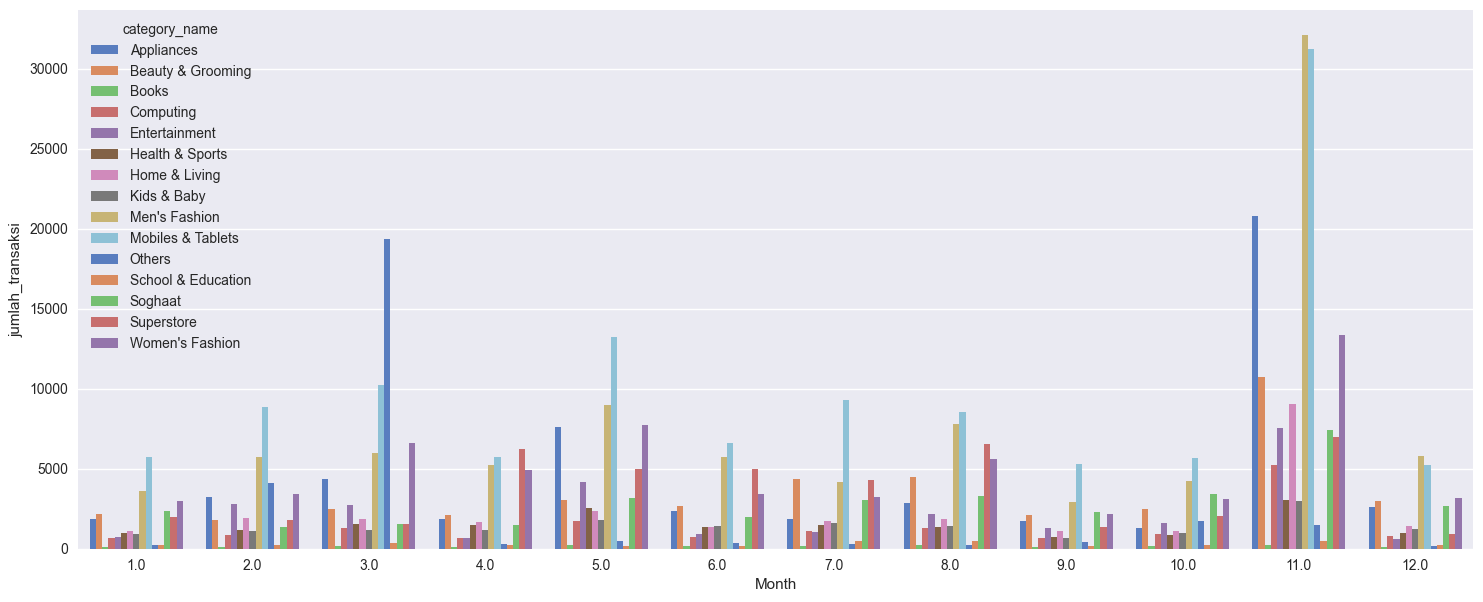

In [730]:
plt.figure(figsize=(18,7))
sns.barplot(data=bestByMonth, x='Month',y='jumlah_transaksi',hue='category_name', palette='muted')

Pada setiap bulannya, rata-rata jumlah transaksi produk tertinggi adalah untuk kategori Mobiles & Tablets disusul oleh kategori Men's Fashion. Kecuali untuk bulan Maret dimana kategori Others menjadi produk dengan transaksi tertinggi. Di Pakistan terdapat perbedaan sosio-kultural antara pria dan wanita dalam penggunaan internet, kemampuan ICT, kepemilikan kartu kredit, akun bank dan digital payment, serta dari segi kemandirian finansial (sumber: [propakistan.pk](https://propakistani.pk/2022/03/03/digital-gender-gap-in-pakistan-men-dominate-the-charts-in-all-categories/)). Dominannya pria dalam hal-hal tersebut dapat menjadi alasan lebih tingginya pembelian kategori produk untuk pria di e-commerce.

## 3. Metode pembayaran pada transaksi di e-commerce

Pembelian produk melalui e-commerce juga seringkali dibarengi dengan metode pembayaran secara online. Terdapat berbagai macam platform penyedia online payment mulai dari layanan yang disediakan bank konvensional seperti mobile banking, credit card, serta bank/dompet digital.

### Metode pembayaran yang paling populer

In [733]:
payment = df['increment_id'].groupby(df['payment_method']).count().sort_values(ascending=False).reset_index().rename(columns={'increment_id' : 'jumlah_transaksi'})
payment

,payment_method,jumlah_transaksi
0,cod,268225
1,Payaxis,96238
2,Easypay,82683
3,jazzwallet,34314
4,easypay_voucher,31083
5,bankalfalah,23057
6,jazzvoucher,15102
7,Easypay_MA,13945
8,customercredit,7509
9,apg,1758


Text(0.5, 1.0, 'Metode pembayaran paling populer')

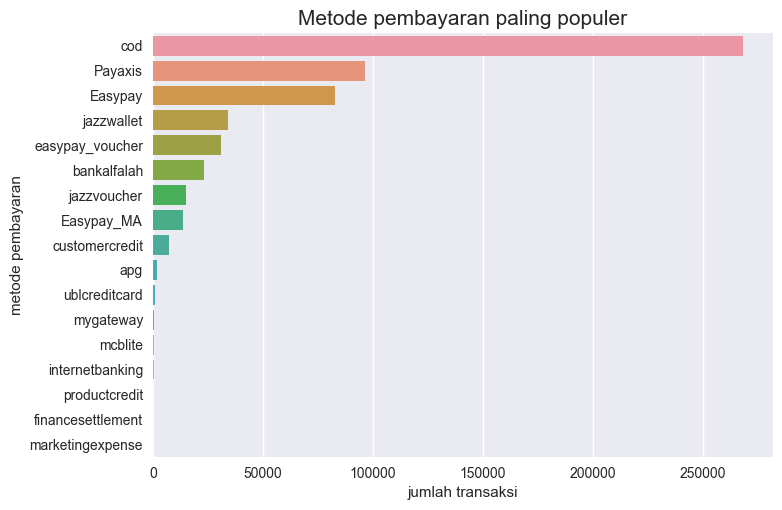

In [734]:
sns.barplot(data=payment, y='payment_method', x='jumlah_transaksi')
plt.xlabel('jumlah transaksi')
plt.ylabel('metode pembayaran')
plt.title('Metode pembayaran paling populer',fontsize = 15)

Meskipun transaksi di e-commerce mengalami peningkatan dari tahun ke tahun ternyata belum dibarengi dengan peningkatan penggunaan metode pembayaran online oleh masyarakat Pakistan. Terlihat dari data yang menunjukan metode pembayaran tertinggi adalah cod dengan perbedaan yang cukup tinggi dengan metode pembayaran lainnya. Menurut studi/survey yang dilakukan terhadap mahasiswa di Pakistan, hanya 32% responden yang sering menggunakan e-wallet/digital payment sementara 55% responden menjawab jarang. Dan hanya 33% responden yang menjawab penggunaan digital payment untuk pembelian produk, jawaban dominan 41% digunakan untuk pembayaran bill atau tagihan listrik dan air  (sumber: [abacademies.org](https://www.abacademies.org/articles/future-of-ewallets-adoption-in-pakistan-a-perspective-of-cashless-pakistan-from-undergraduates-14975.html)). 

Untuk layanan digital payment yang paling sering digunakan adalah dari platform Payaxis diikuti oleh Easypay dan jazzwallet. Menurut studi/survey terhadap mahasiswa di Pakistan, 45% menggunakan layanan e-payment dari Jazzcash dan 30% menggunakan Easypaisa/Easypay (sumber: [abacademies.org](https://www.abacademies.org/articles/future-of-ewallets-adoption-in-pakistan-a-perspective-of-cashless-pakistan-from-undergraduates-14975.html)). Sementara layanan bank konvensional yang paling sering digunakan adalah Bank AlFalah.

### Payment method vs status transaksi

In [735]:
statusByPayment = df.groupby(['payment_method','status']).count()['increment_id'].reset_index().rename(columns={'increment_id' : 'jumlah_transaksi'})
statusByPayment

,payment_method,status,jumlah_transaksi
0,Easypay,canceled,51869
1,Easypay,complete,27491
2,Easypay,processing,2
3,Easypay,refunded,3321
4,Easypay_MA,canceled,9147
5,Easypay_MA,complete,4356
6,Easypay_MA,refunded,442
7,Payaxis,canceled,60159
8,Payaxis,complete,31794
9,Payaxis,processing,12


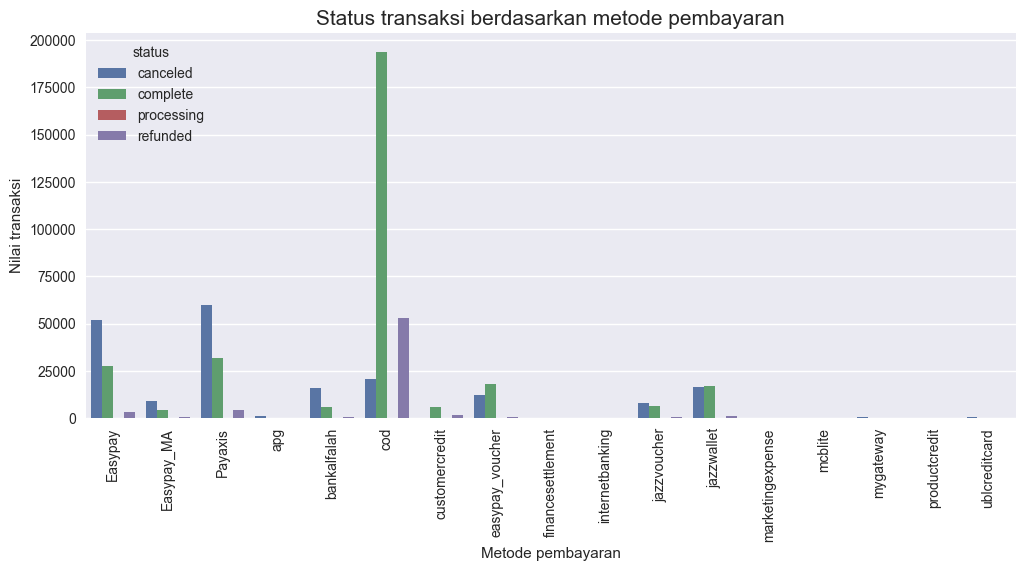

In [736]:
plt.figure(figsize=(12,5))
sns.barplot(data=statusByPayment, x='payment_method', y='jumlah_transaksi', hue='status')
plt.title('Status transaksi berdasarkan metode pembayaran', fontsize=15)
plt.xlabel('Metode pembayaran')
plt.xticks(rotation=90)
plt.ylabel('Nilai transaksi')
plt.show()

Dari visualisasi diatas dapat terlihat bahwa untuk jenis metode pembayaran dengan digital payment memiliki jumlah transaksi canceled yang lebih tinggi dibandingkan dengan transaksi complete. Hal ini mendukung asumsi bahwa tingkat penggunaan digital payment di Pakistan masih rendah. Sedangkan untuk metode pembayaran yang paling banyak digunakan yaitu cod memiliki jumlah transaksi complete yang paling tinggi dan transaksi canceled yang rendah, sehingga dapat kita asumsikan bahwa pada periode transaksi Juli 2016 hingga Agustus 2018 metode cod lebih dipercaya oleh masyarakat Pakistan dibandingkan pembayaran dengan digital payment. Salah satu alasannya diperkirakan karena masalah keamanan, pelanggan merasa lebih aman membayar setelah melihat produk benar-benar diantar oleh kurir dan melihat kondisi produk. Kelebihan lainnya adalah setelah menerima produk kita dapat menilai kembali kelayakan produk dan memutuskan untuk melanjutkan pembelian atau mengembalikan/menukar barang melalui kurir. Hal ini terlihat dari tingkat transaksi refunded yang paling tinggi terjadi pada metode pembayaran cod.

# Kesimpulan

Berdasarkan analisis data yang telah dilakukan, kita dapat menjawab beberapa pertanyaan mengenai perilaku belanja masyarakat Pakistan di e-commerce, yang telah disebutkan di awal.
1. Pertumbuhan transaksi e-commerce di Pakistan pada tahun 2016-2018 terus meningkat seiring meningkatnya penggunaan internet oleh masyarakat Pakistan maupun secara global. Dari hasil perhitungan data, rata-rata total transaksi tertinggi di e-commerce terjadi pada bulan Juni. Diasumsikan hal ini terjadi karena pada periode bulan Mei-Juni di tahun 2016-2018 merupakan bulan ramadhan, sehingga masyarakat Pakistan yang mayoritas muslim melakukan lebih banyak transaksi menjelang hari raya Idul Fitri. Rata-rata volume transaksi tertinggi yang terjadi di bulan November disebabkan karena adanya event diskon besar-besaran yang diselenggarakan oleh platform e-commerce dan digital payment sehingga mendorong masyarakat untuk lebih banyak melakukan transaksi.
2. Best selling category di e-commerce Pakistan pada periode 2016-2018 adalah kategori Mobile & Tablets diikuti dengan Men's Fashion yang merupakan kategori produk yang biasa diminati oleh pria. Diasumsikan hal ini terjadi karena lebih dominannya pria dalam penggunaan internet dan kepemilikan kartu kredit dan digital payment di Pakistan. Sementara kategori yang paling sedikit dibeli adalah Books, School & Education yang berkaitan dengan tingkat literasi yang cukup rendah di Pakistan.
3. Metode pembayaran yang paling populer digunakakan di e-commerce Pakistan pada periode 2016-2018 adalah cod. Meskipun tingkat penggunaan internet terus meningkat masyarakat masih lebih percaya dengan metode cod dibandingkan digital payment sebagai metode pembayaran. Diasumsikan hal ini disebabkan karena masalah keamanan dimana pelanggan ingin menerima produk dahulu baru membayar, atau bila kondisi produk tidak sesuai dapat langsung dikembalikan melalui kurir, terlihat dari tingkat refund yang cukup tinggi pada metode cod.

# Rekomendasi

1. Berdasarkan waktu transaksi, jumlah transaksi yang tinggi dipengaruhi oleh adanya hari raya dan juga event promosi besar. Maka sebagai rekomendasi untuk meningkatkan total transaksi adalah menambah event-event promosi di hari raya/hari besar lain selain bulan ramadhan dan hari black friday. Misalnya diskon akhir tahun, diskon hari raya natal, atau diskon saat awal tahun ajaran baru di sekolah. 

2. Perilaku belanja masyarakat Pakistan dipengaruhi oleh kebiasaan sosio-kultural dimana pria lebih dominan dalam penggunaan internet dan kepemilikan akun bank/digital payment. Selain itu juga masih rendahnya tingkat literasi dan kemampuan ICT pada masyarakat terutama wanita. Salah satu rekomendasi yang dapat dilakukan yaitu terkait pemerataan pendidikan dan keterlibatan wanita pada sektor ekonomi. Pemerataan pendidikan akan meningkatkan tingkat literasi dan kemampuan ICT masyarakat baik pria maupun wanita. Keterlibatan wanita dalam sektor ekonomi akan meningkatkan kemandirian finansial yang akan berpengaruh positif pada pertumbuhan ekonomi dan secara tidak langsung meningkatkan peran wanita dalam transaksi di e-commerce. Hal ini membutuhkan kerjasama dengan pemerintah sebagai penentu kebijakan pendidikan dan ekonomi. Langkah yang dapat diambil oleh perusahaan e-commerce diantaranya menyelenggarakan event promosi khusus wanita, misalnya diskon khusus untuk pengguna wanita atau produk-produk wanita dan anak di Hari Ibu atau hari besar lain yang identik dengan wanita. Diskon kategori produk anak akan mendorong minat wanita untuk melakukan transaksi. Saran lainnya adalah menyelenggarakan pelatihan bagi wanita yang ingin membuka toko online sehingga akan mendorong kemampuan ICT dan keterlibatan wanita di dunia digital/e-commerce.

3. Untuk mendorong penggunaan digital payment sebagai metode pembayaran, perusahaan e-commerce atau bank dan e-wallet dapat membuat iklan atau promosi yang memiliki pengaruh meningkatkan kepercayaan masyarakat terhadap keamanan penggunaan digital payment. Selain itu event diskon besar-besaran juga terbukti meningkatkan minat dan jumlah transaksi di e-commerce, untuk itu perusahaan dapat menambah diskon-diskon bila pelanggan menggunakan digital payment sebagai metode pembayaran. Peningkatan transaksi dengan digital payment dapat meningkatkan revenue perusahaan dan bank, sementara penurunan transaksi dengan metode cod juga dapat mengurangi extra cost dalam hal pengiriman barang refund.